# Multiple Linear Regression
* Read the data from CSV
* Read all independent columns to X
* Read dependent (predictable) column to y
* X has categorical column called 'State', **do one-hot-encoding for categorical varaibles**
* Split the X,y to training and test data-sets

![](../../data-csv/media-pics-videos/multi-var-lr.jpeg)

In [1]:
# import pandas, matplotlib and numpy
import pandas as pd
import numpy as np

In [2]:
# Read 50 startups data
df_startup = pd.read_csv('../../data-csv/csv-files/50_Startups.csv')
df_startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
# Read all the columns except the 'Profit' column to X
X = df_startup.iloc[:, :-1]
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [4]:
# Read the 'Profit' column to y
y = df_startup.iloc[:, 4]
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [5]:
# "State" is a categorical variable, lets use One Hot encoding 
# One hot encoding is a process by which categorical variables are converted into a form that could be 
# provided to ML algorithms to do a better job in prediction.
# Drop one column to avoid "DUMMY VARIABLE TRAP"
states = pd.get_dummies(X['State'], drop_first=True)
states.head()

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0


In [6]:
# Drops the 'State' column from X
X = X.drop('State', axis=1)
X.head()

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [7]:
# Conacat "one-hot-encoded" values of State column to X (axis=1 means add column)
X = pd.concat([X, states], axis=1)
X.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [10]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [9]:
# LinearRegression fits a linear model with coefficients w = (w1, …, wp) using 
# plain Ordinary Least Squares
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
# From the regressor object lets print coefficient
regressor.coef_

array([ 7.73467193e-01,  3.28845975e-02,  3.66100259e-02, -9.59284160e+02,
        6.99369053e+02])

In [32]:
# From the regressor object lets print intercept
regressor.intercept_

42554.16761773237

In [11]:
y_pred = regressor.predict(X_test)

In [12]:
# Model evaluation using Means squared error
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

# This is the mean absolute error for test-dataset

7514.293659640612

Text(0.5, 1.0, 'Marketing Spend')

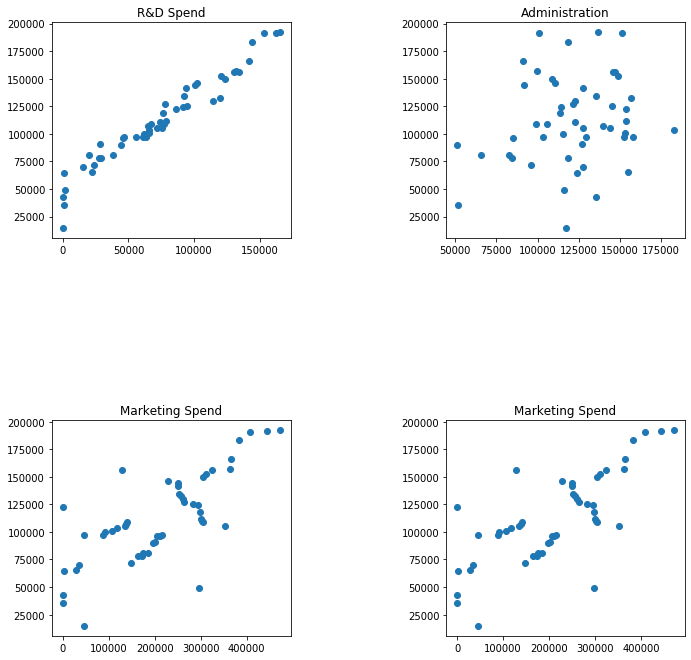

In [25]:
import matplotlib.pyplot as plt

#Following 2 lines improves the spacing between plots
fig, axes = plt.subplots(nrows=4, ncols=4)
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

#Following 2 lines increases size of subplots
fig.set_figheight(10)
fig.set_figwidth(10)

#Create a plot at index 1
plt.subplot(2,2,1)
plt.scatter(df_startup['R&D Spend'],df_startup['Profit'])
plt.title('R&D Spend')

plt.subplot(2,2,2)
plt.scatter(df_startup['Administration'],df_startup['Profit'])
plt.title('Administration')

plt.subplot(2,2,3)
plt.scatter(df_startup['Marketing Spend'],df_startup['Profit'])
plt.title('Marketing Spend')

plt.subplot(2,2,4)
plt.scatter(df_startup['Marketing Spend'],df_startup['Profit'])
plt.title('Marketing Spend')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12caf8780>,
      dtype=object)

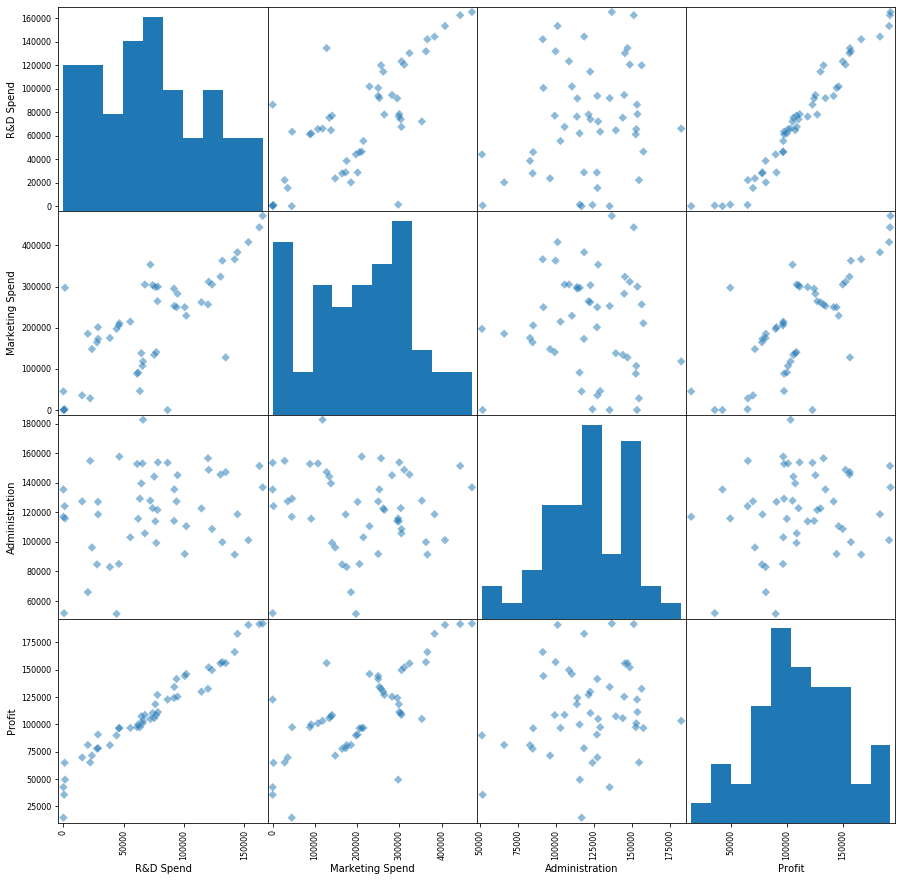

In [29]:
#Scatter matrix
#A very efficient way to stop any strong corelation between features/columns
pd.plotting.scatter_matrix(df_startup[['R&D Spend','Marketing Spend','Administration','Profit']], figsize=(15,15), marker = 'D')

## Feature selection using backward elimination

* We have 4 features (also called independent variables) in the given data-set
* Some features may be statistically more significant to predict profit than the others
* Some features may have very less statistical significance 
* We need to identify and one of the technique used called Backward elimination

In [13]:
# To eliminate feature with least significance we use a statistical number called as "P-value"
# We can get the p-value of each feature/column using statsmodel.formula.api library
#!pip3 install statsmodels
import statsmodels.regression.linear_model as sm_regrsr_lmodel
X = np.append(arr = np.ones([50,1]).astype(int), values = X, axis = 1)

In [14]:
X_opt = X[:,[0,1,2,3,4]]
regressor_OLS = sm_regrsr_lmodel.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Fri, 13 Mar 2020   Prob (F-statistic):           8.49e-29
Time:                        15:47:59   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.011e+04   6647.870      7.537      0.000    3.67e+04    6.35e+04
x1             0.8060      0.046     17.606      0.000       0.714       0.898
x2            -0.0270      0.052     -0.523      0.604      -0.131       0.077
x3             0.0270      0.017      1.592      0.118      -0.007       0.061
x4           220.1585   2900.536      0.076      0.940   -5621.821    6062.138
==============================================================================
Omnibus:                       14.758   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.172
Skew:                          -0.948   Prob(JB):                     2.53e-05
Kurtosis:                       5.563   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
X_opt = X[:,[0,1,2,3]]
regressor_OLS = sm_regrsr_lmodel.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

In [ ]:
X_opt = X[:,[0,1,3]]
regressor_OLS = sm_regrsr_lmodel.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

In [ ]:
X_opt = X[:,[0,1]]
regressor_OLS = sm_regrsr_lmodel.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

In [ ]:
#Lets once again fit linear regression model using just R&D column
from sklearn.model_selection import train_test_split
X_opt_train, X_opt_test, y_opt_train, y_opt_test = train_test_split(X_opt, y, test_size = 0.2, random_state = 0)
# LinearRegression fits a linear model with coefficients w = (w1, …, wp) using 
# plain Ordinary Least Squares
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_opt_train, y_opt_train)
y_opt_pred = regressor.predict(X_opt_test)
# Model evaluation using Means squared error
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_opt_test, y_opt_pred)

## Automatic Backward Elimination

In [ ]:
import statsmodels.regression.linear_model as sm
def backwardElimination(x, sl):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = float(max(regressor_OLS.pvalues))
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
    regressor_OLS.summary()
    return x
 
SL = 0.05
X_opt = X[:, [0, 1, 2, 3, 4, 5]]
X_Modeled = backwardElimination(X_opt, SL)